In [1]:
# Importing the necessary Libraries
import numpy as np 
import pandas as pd

In [2]:
import statistics

In [3]:
import seaborn as sns

In [4]:
df = sns.load_dataset('tips')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
# Check the mean of individual column
np.mean(df['total_bill'])

19.785942622950824

In [17]:
np.median(df['total_bill'])

17.795

In [18]:
statistics.mode(df['total_bill'])

13.42

C:\Users\reliance\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

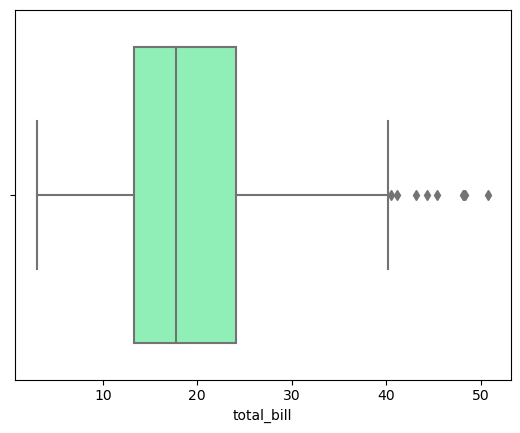

In [23]:
# Boxplot(the feature contains outliers)
sns.boxplot(df['total_bill'],palette='rainbow')

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

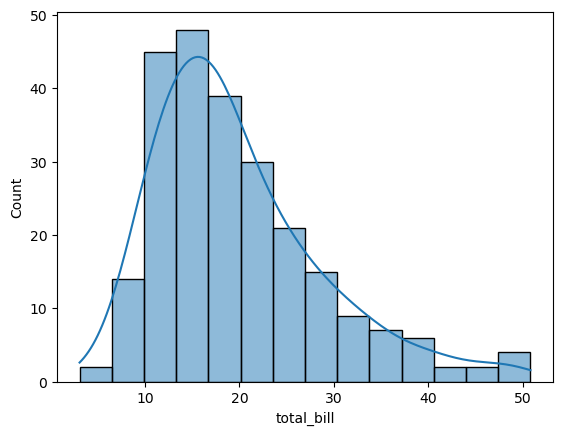

In [26]:
sns.histplot(df['total_bill'],kde = True)
# Doesn't follow the gaussian distribution

In [27]:
df1 = sns.load_dataset('iris')

In [28]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

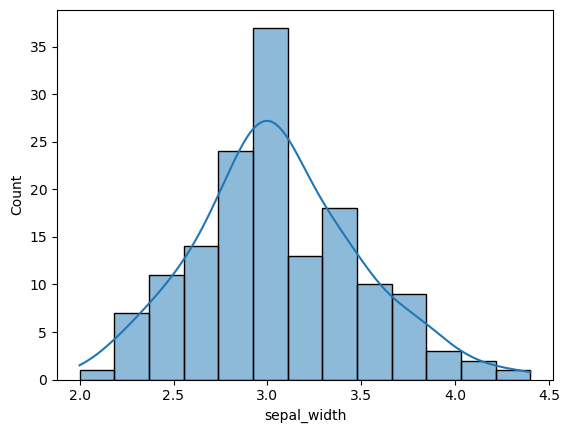

In [33]:
sns.histplot(df1['sepal_width'],kde=True)
# It is actually following the normal distribution
# You can actually apply all the rules over here

In [38]:
np.percentile(df1['sepal_length'],[25 ,50 , 75])

array([5.1, 5.8, 6.4])

# Outliers using z-score

In [40]:
# Actually we can say that after 3rd std deviation whatever the values falls within the range would be
# treated as outliers

In [46]:
def detect_outlier(data):
    outliers = []
    threshold = 3    # 3rd std deviation if we want to more penlize the outlier then use 2.5
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if z_score > threshold:
            outliers.append(i)
            
    return outliers

In [81]:
x = detect_outlier(df['total_bill']) # Tips dataset

# Outliers using IQR

1. sort the data
2. Find the q1,q2 and q3
3. Find the IQR = q3 - q1
4. Find the lower fense = q1 - 1.5*(IQR)
5. Find the upper fense = q3 + 1.5*(IQR)

In [99]:
def iqr_method(data):
    data = np.array(sorted(data))
    outliers = []
    
    q1 = np.percentile(data,[25])
    median = np.median(data)
    q3 = np.percentile(data,[75])
    
    
    iqr = q3 - q1

    upper_fense = q3 + (1.5*iqr)
    lower_fense = q1 - (1.5*iqr)
    for value in data:
        if value < lower_fense or value > upper_fense:
            outliers.append(value)
    
    return outliers

In [100]:
iqr_method(df['total_bill'])

[40.55, 41.19, 43.11, 44.3, 45.35, 48.17, 48.27, 48.33, 50.81]